# Model and data points for numerical simulations

### Things we have to import

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from PIL import Image

import numpy as np
import pickle

# 3D visualization
import pyvista as pv

from gravmag.models import rectangular_prism as rp
from gravmag import plot_functions as plf

### Points were we compute the synthetic data

In [2]:
data_points = dict()

In [3]:
# number of points along x and y
shape = (50, 50)

# minimum x, maximum x, minimum y and maximum y
area = [-5000, 5000, -4000, 6000]

In [4]:
data_points['shape'] = shape
data_points['area'] = area

In [5]:
# coordinates 
xp = np.linspace(area[0], area[1], shape[0])
yp = np.linspace(area[2], area[3], shape[1])

In [6]:
z0 = -100

In [7]:
data_points['grid'] = {'x' : xp[:,np.newaxis], 'y' : yp, 'z' : z0, 'ordering' : 'yx'}

In [8]:
# generate an y-oriented grid
xp, yp = np.meshgrid(xp, yp, indexing="ij")

yp = np.ravel(yp)
xp = np.ravel(xp)
zp = np.zeros_like(xp) + z0

In [9]:
xp

array([-5000., -5000., -5000., ...,  5000.,  5000.,  5000.])

In [10]:
yp

array([-4000.        , -3795.91836735, -3591.83673469, ...,
        5591.83673469,  5795.91836735,  6000.        ])

In [11]:
data_points['coordinates'] = {'x' : xp, 'y' : yp, 'z' : zp}

In [12]:
file_name = 'data_points.pickle'
with open(file_name, 'wb') as f:
    pickle.dump(data_points, f)

### Model

In [13]:
model = dict()

#### Main model

In [14]:
# Create a model formed by a single prism
prisms_main = np.array([[-500, 500, 0, 2000, 10, 1010],
                        [-1500, -500, 1000, 3000, 100, 1200],
                        [1000, 3000, 2000, 2500, 90, 1500],
                        [-4000, -1000, -3000, 1000, 100, 1400],
                        [-3000, 1000, -2000, 4000, 1000, 1500]])

densities_main = np.array([1500, -1800, -3000, 1200, -900]) # 2000 kg/m³ = 2 g/cm³

#### Geological noise

In [15]:
# center of Ns sources randomly distributed in the simulated area
Ngn = 300

xgn = area[0] + (area[1] - area[0])*np.random.rand(Ngn)
ygn = area[2] + (area[3] - area[2])*np.random.rand(Ngn)
zgn_top = 100.*np.random.rand(Ngn)

# sizes 
Lgn = 100. + 200*np.random.rand(Ngn)

# densities
densities_gn = 2000. + 1000.*np.random.rand(Ngn)

# create the sources
prisms_gn = np.zeros((Ngn, 6))
prisms_gn[:,0] = xgn - 0.5*Lgn
prisms_gn[:,1] = xgn + 0.5*Lgn
prisms_gn[:,2] = ygn - 0.5*Lgn
prisms_gn[:,3] = ygn + 0.5*Lgn
prisms_gn[:,4] = 0.
prisms_gn[:,5] = zgn_top + Lgn

In [16]:
prisms = np.vstack([prisms_main, prisms_gn])
densities = np.hstack([densities_main, densities_gn])

In [17]:
prisms_dict = {
    'x1' : prisms[:,0],
    'x2' : prisms[:,1],
    'y1' : prisms[:,2],
    'y2' : prisms[:,3],
    'z1' : prisms[:,4],
    'z2' : prisms[:,5]
}

In [18]:
prisms_main_dict = {
    'x1' : prisms_main[:,0],
    'x2' : prisms_main[:,1],
    'y1' : prisms_main[:,2],
    'y2' : prisms_main[:,3],
    'z1' : prisms_main[:,4],
    'z2' : prisms_main[:,5]
}

In [19]:
model['prisms'] = prisms_dict
model['densities'] = densities

In [20]:
file_name = 'synthetic_bodies.pickle'
with open(file_name, 'wb') as f:
    pickle.dump(model, f)

### Plot the computed gravity disturbance with Matplotlib

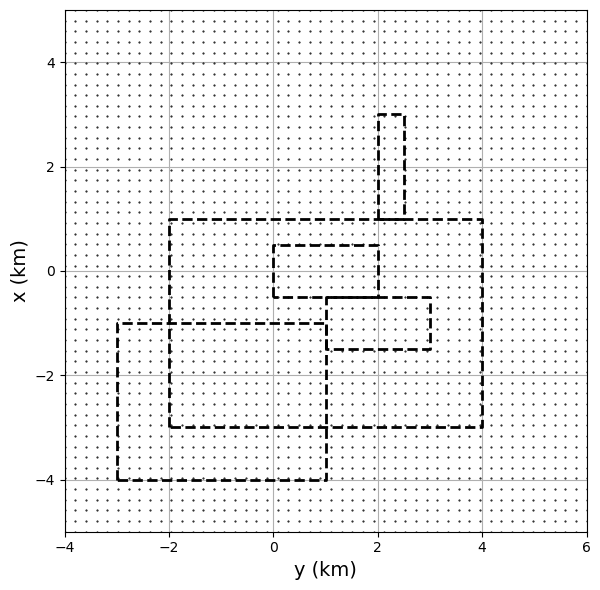

In [21]:
plt.figure(figsize=(7,6))

#plt.title("Gravity disturbance (mGal)")
plt.axis('scaled')
plt.plot(yp.reshape(shape)*0.001, 
         xp.reshape(shape)*0.001, 
         'k.', ms=1)
plf.model_boundaries(prisms_main_dict)
plt.ylim(0.001*area[0], 0.001*area[1])
plt.xlim(0.001*area[2], 0.001*area[3])
plt.xlabel('y (km)', fontsize=14)
plt.ylabel('x (km)', fontsize=14)
plt.grid()
plt.tight_layout()

plt.show()

### Plot  and/or save the computed gravity disturbance and the model with PyVista

In [22]:
model_mesh = plf.prisms_to_pyvista(prisms_dict, densities)

AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
pv.set_plot_theme('dark')

pl = pv.Plotter()
#pl.set_background('gray')

#parameters of model colorbar
model_sargs = dict(
    title='density (kg/m^3)',
    title_font_size=20,
    label_font_size=16,
    shadow=True,
    n_labels=7,
    italic=True,
    fmt="%.1f",
    font_family="arial",
)

# add model
pl.add_mesh(
    model_mesh,
    scalars='prop',
    cmap='viridis',
    lighting=True,
    scalar_bar_args=model_sargs,
    show_edges=True,
)

# set visualization parameters
# the order of the commands below changes the result
pl.camera_position = 'zy'
pl.camera.roll = -90
pl.camera.azimuth = 15
pl.camera.elevation = 30
pl.camera.zoom(1.1)

pl.show_axes()

# show the interactive plot
# pl.show()

# save the image in an external file
pl.screenshot('../manuscript/Fig/synthetic_bodies.png', return_img=False)

### Plot the external image generated with PyVista

In [ ]:
# read image generated with PyVista
image = Image.open('synthetic_bodies.png')

# plot image generated with PyVista
plt.figure(figsize=(15,15))
plt.imshow(image)
plt.xticks([]) # remove x ticks
plt.yticks([]) # remove y ticks
plt.show()